In [13]:
id1 = "316540467"
id2 = "316365733 "

name_student_1 = "Ameer Faour"
name_student_2 = "Eden Duktzayev"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

# q1 
#### השמטנו את כלל הערכים החסרים דרך פונקצית dropna
#### והצגנו רק שלושת השורות הראשונות ואת עמודות age,hight,weight,salary דרך פונקציית ioc

In [14]:
data=pd.read_csv("https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv")
dataFrame=data.dropna()
dataFrame.loc[0:3,['Age','Height','Weight','Salary']]

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
3,22.0,6-5,185.0,1148640.0


# q2
#### על מנת לעשות פעולות חישוב צריך להפוך את הגובה למספר מסוג float
#### ולכן השתמשנו דרך פונקצית str replace להפוך את גובה למספר float

In [15]:
nba_file=dataFrame.copy()
nba_file["Height"]=nba_file["Height"].str.replace("-",".").astype("float")
nba_file.loc[0:3,['Age','Height','Weight','Salary']]

,Age,Height,Weight,Salary
0,25.0,6.2,180.0,7730337.0
1,25.0,6.6,235.0,6796117.0
3,22.0,6.5,185.0,1148640.0


# q3
#### על מנת להציג את שתיהן בצורה יפה אחת ליד השניה השתמשנו ב subplot 
#### ולאחר מכן יצרנו pieplot ו countplot
#### דרך countplot ניתן להראות בצורה יותר טובה כי זה מציג מספרים בפועל ולא אחוזים

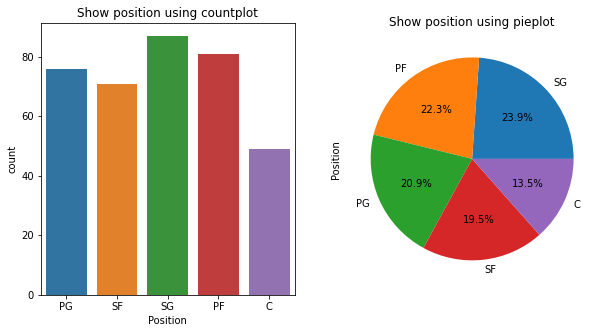

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Show position using countplot")
sns.countplot(x="Position", data=nba_file)
plt.subplot(1,2,2)
plt.title("Show position using pieplot")
nba_file['Position'].value_counts().plot.pie(autopct="%1.1f%%")

# q4
#### עשינו אימון ומבחן לחלק מהדאטה כמו למדנו בשיעור

In [17]:
X=nba_file[["Age","Height","Weight"]]
y=nba_file[["Salary"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 

In [18]:
X_train.head()

,Age,Height,Weight
332,22.0,6.70,232.0
285,26.0,6.60,220.0
191,26.0,6.30,208.0
24,21.0,6.11,200.0
181,33.0,6.90,245.0


In [19]:
y_test.head()

,Salary
232,2085671.0
42,1636842.0
19,6300000.0
435,3075880.0
71,3553917.0


# q5
#### השתמשנו במודל regression מכיוון שיש םה התפלגות מספרית רציפה בצורה אינסופית, וישנם אינסוף מספרים בין הכי נמוך ביותר לגבוה ביותר
#### במודל classified ניתן להתשמש בו נגיד אם אנחנו רוצים לעשות חלוקה לדברים בדידים כמו לזהות כלבים או פרחים (כמו שעשינו בהרצאה)

In [20]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

# q6
#### עשינו פונקציה שדרכה עושים prediction על מנת לנבא את הדיוק (mse)

In [21]:
from sklearn.metrics import mean_squared_error
def mse(a,b):
    pred = model.predict(X_test)
    print("The MSE is:",mean_squared_error(pred,y_test,squared=False))
mse(X,y)

The MSE is: 7102040.645252005


In [22]:
mse(X,y)

The MSE is: 7102040.645252005


# q7
#### דרך get dummies ולאחר מגן concat הוספנו את שאלה הנתונים שאנו רוצים להיכנס על מנת להגיע לרמת דיוק יותר טובה, והוספנו אותם בצורה בוליאנית (1,0) 
#### על מנת שנוכל להשתמש בזה בחישוב ולאחר מכן עשינו שוב תהליך של המודל וקיבלנו שיפור משמעותי ב mse

In [23]:
X=nba_file[["Age","Height","Weight","C","PF","PG","SF","SG"]]
y=nba_file[["Salary"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)
mse(X,y)

KeyError: "['SG', 'PG', 'C', 'PF', 'SF'] not in index"

# q8
#### חיפשנו עומק שבו נקבל mse יותר טוב ומצאנו שזה מתקבל בעומק 4 ולכן הגבלנו את זה ל max depth

In [11]:
Z_train,Z_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model_fixed_depth = DecisionTreeRegressor(max_depth=4,random_state=42)
model_fixed_depth.fit(X_train,y_train)

prediction = model_fixed_depth.predict(X_test)
print("The MSE is:",mean_squared_error(prediction,y_test,squared=False))

The MSE is: 4801664.756685712
